# 1. Python入門
# 1. Introduction of Python

Pytorchを使ったディープラーニング・プログラミングで重要になる概念だけ抜き出して説明する

I extract and explain only the concepts that are important in deep learning programinng using PyTorch.

In [1]:
# 必要ライブラリのインポート
# Import required libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# warning表示OFF
# Ignore worning signs
import warnings
warnings.simplefilter('ignore')

# デフォルトフォントサイズ変更
# Set default font size
plt.rcParams['font.size'] = 14

# デフォルトグラフサイズ変更
# Set default graph size
plt.rcParams['figure.figsize'] = (6,6)

# デフォルトで方眼表示ON
# Show grid
plt.rcParams['axes.grid'] = True

# numpyの表示桁数設定
# Set precision of numpy
np.set_printoptions(suppress=True, precision=5)

## 1.2 コンテナ変数にご用心
## 1.2 Be careful with variables of container data type

In Python, variables are simply pointers to actual data structure.

Numpy arrays may lead to unexpected results if you are not aware of this.

### Numpy 変数間
### Between NumPy variables

In [3]:
# NumPy配列 x1 を定義
# Define NumPy array x1
x = np.array([5, 7, 9])

# 変数yにxを代入する
# Assign x to y
# このとき、実数は共通なまま
# In this time, instance remains common
y = x

# 結果確認
# Confirm results
print(x)
print(y)

[5 7 9]
[5 7 9]


In [4]:
# 問題例
# The example of problem!

# ここでxの特定の要素の値を変更する
# Now, change the value of a particular element of x
x[1] = -1

# すると、yも変動して値が変わる
# Then, the y's value is also changed automatically.
print(x)
print(y)

[ 5 -1  9]
[ 5 -1  9]


In [5]:
# yも同時に変化して困る場合は、代入時にcopy関数を利用する
# if you don't want to chenge y's value, use copy function
x = np.array([5, 7, 9])
y = x.copy()

# すると、xの特定の要素値の変更がyに影響しなくなる
# The y's value isn't changed by the change of x's value
x[1] = -1
print(x)
print(y)

[ 5 -1  9]
[5 7 9]


### テンソルとNumpy間
### Between tensor and NumPy

In [6]:
import torch

# x1: shape=[5] となるすべて値が1テンソル
# x1: all values of shape=[5] are tensor of 1
x1 = torch.ones(5)

# 結果確認
# Confirm result
print(x1)

# x2 x1から生成したNumPy
# x2: Numpy generated from x1
x2 = x1.data.numpy()

# 結果確認
# Confirm result
print(x2)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [7]:
# 問題例
# The example of problem!

# x1の値を変更
# Change the value of x1
x1[1] = -1

# 連動してx2の値も変わる
# The value of x2 is automaically changed
print(x1)
print(x2)

tensor([ 1., -1.,  1.,  1.,  1.])
[ 1. -1.  1.  1.  1.]


In [8]:
# 安全な方法
# How to change safely

# x1: テンソル
# x1: tensor
x1 = torch.ones(5)

# x2: x1から生成したNumpy
# x2: Numpy copied from x1
x2 = x1.data.numpy().copy()

x1[1] = -1

# 結果確認
# Confirm results
print(x1)
print(x2)

tensor([ 1., -1.,  1.,  1.,  1.])
[1. 1. 1. 1. 1.]


## 数学上の合成関数とPythonの合成関数
## 1.3 Mathmatical composition functions and how to implement it by Python

数学上の合成関数がPythonでどう実装されるのか確認する


Check how mathmatical conposition functions are implemented in Python

Define $f(x) = 2x^2 + 2$を関数として定義する。


Define $f(x) = 2x^2 + 2$ as the function

In [9]:
# f(x) = 2x^2 + 2
def f(x):
    return (2 * x**2 + 2)

In [10]:
# xをnumpy配列で定義
# Define x as Numpy array
# Range : [-2, 2] 
# Step : 0.25
x = np.arange(-2, 2.1, 0.25)
print(x)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]


In [11]:
# f(x)の結果をyに代入
# Substitute the result of f(x) to y
y = f(x)
print(y)

[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


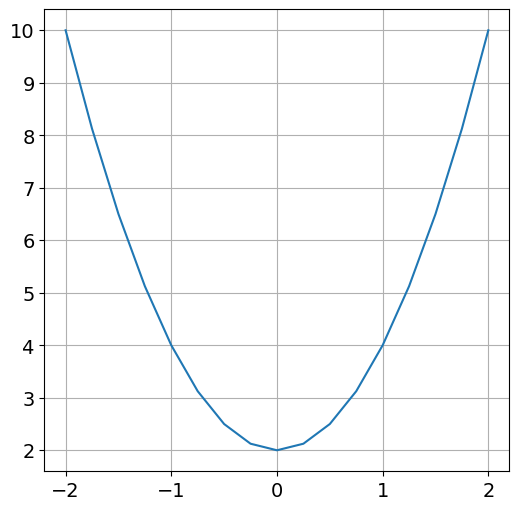

In [12]:
# 関数のグラフ表示
# Show the graph of (x, f(x))
plt.plot(x,y)
plt.show()

In [13]:
# 3つの基本関数の定義
# Definition of three basic function
def f1(x):
    return(x**2)

def f2(x):
    return(x*2)

def f3(x):
    return(x+2)

# 合成関数を作る
# Create composite function
x1 = f1(x)
x2 = f2(x1)
y = f3(x2)

In [14]:
# 合成関数の値の確認
# Confirm value of composite function
print(y)

[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


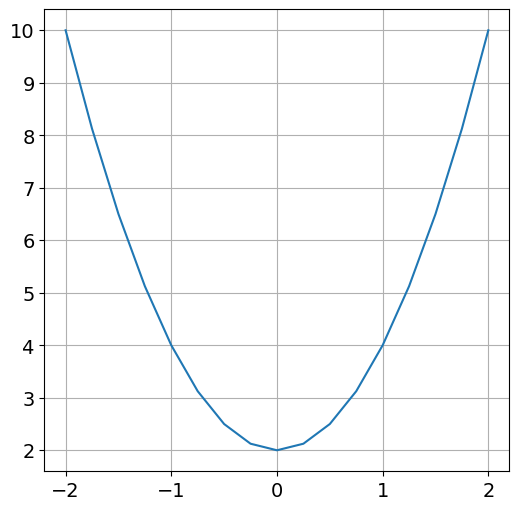

In [15]:
# 合成関数のグラフ表示
# Show the graph of composite function
plt.plot(x, y)
plt.show()

## 1.4 数学上の微分とPythonでの数値微分実装
## 1.4 Mathmatical differentiation and Numerical differential implementation in python

Pythonでは、関数もまた、変数名は単なるポインタで、実体は別にある


In python, functions are variable names and simply pointers. And their entities are separated.


このことを利用すると、「関数を引数とする関数」を作ることが可能になる。


By using this, it becomes possible to create "function with functions as arguments"


ここで関数を数値微分とする関数diffを定義する


Here, I difine a function ``diff`` that numerically differentiates a function.


数値微分の計算には、普通の微分の定義式よりいい近似値である

$f'(x) = \dfrac{f(x+h)-f(x-h)}{2h}$

To calculate the numerical derivative, I use $f'(x) = \dfrac{f(x+h)-f(x-h)}{2h}$, which is a better approximation than the nomal definition of defferentiation.

In [16]:
# 関数を微分する関数fdiffの定義
# Difine the function fdiff that differentiate the function
def fdiff(f):
    # 関数fを引数に微分した結果の関数をdiffとして定義
    # Difine the function obtained by differentiating the function f as an augument as diff
    def diff(x):
        h = 1e-6
        return (f(x+h) - f(x-h)) / (2*h)
    
    # fdiffの戻りは微分した結果の関数diff
    # the return of fdiff is the function diff of the differentiated result
    return diff

Apply the function fdiff you just made to the quadratic function f, and try to calculate the numerical differentiation.

In [17]:
# 2次関数の数値微分
# Numerical differentiation of quadratic functions

# fの微分結果の関数diffを取得
# Get the function diff of the differentiated result of f
diff = fdiff(f)

# 微分結果を計算しy_dashに代入
# calcurate fdiff and substitute the result to y_dash
y_dash = diff(x)

# 結果確認
# Confirm results
print(y_dash)

[-8. -7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.]


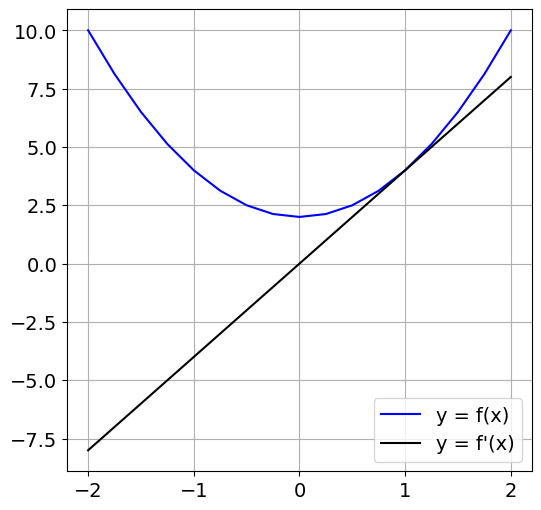

In [18]:
# 結果のグラフ表示
# Show results
# rはLaTeXモードを意味する
# r means LaTeX mode
plt.plot(x, y, label=r'y = f(x)', c = 'b')
plt.plot(x, y_dash, label=r"y = f'(x)", c = 'k')
plt.legend()
plt.show()

シグモイド関数 $g(x) = \dfrac{1}{1 + \exp(-x)}$ に対して同じことをやってみる


Try to do the same method to sigmoid function $g(x) = \dfrac{1}{1 + \exp(-x)}$

In [19]:
# シグモイド関数の定義
# The definition of Sigmoid function
def g(x):
    return 1 / (1 + np.exp(-x))

In [20]:
# シグモイド関数の計算
# Calculate sigmoid function
y = g(x)
print(y)

[0.1192  0.14805 0.18243 0.2227  0.26894 0.32082 0.37754 0.43782 0.5
 0.56218 0.62246 0.67918 0.73106 0.7773  0.81757 0.85195 0.8808 ]


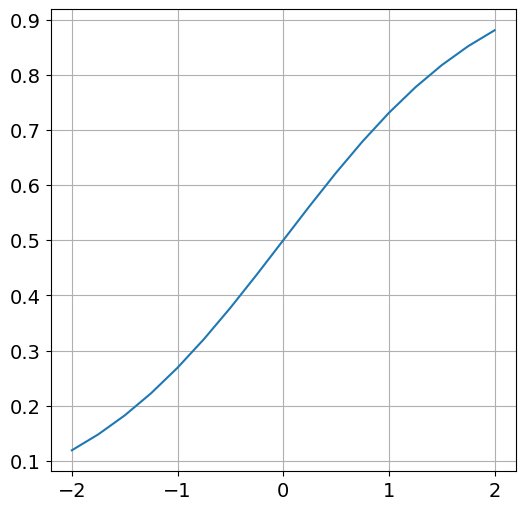

In [21]:
# 関数のグラフ表示
# Show the graph of function

plt.plot(x, y)
plt.show()

In [22]:
# シグモイド関数の数値微分
# Numerical differentiation of sigmoid function

# fdiffを使う
# Use fdiff
# gを微分した関数を取得
# Get the function obtaind differentiating the function g
diff = fdiff(g)

# diffを用いて微分結果y_dashを計算
# Calculate y_dash the result of differentiation by using diff
y_dash = diff(x)

# 結果確認
# confirm results
print(y_dash)

[0.10499 0.12613 0.14915 0.1731  0.19661 0.21789 0.235   0.24613 0.25
 0.24613 0.235   0.21789 0.19661 0.1731  0.14915 0.12613 0.10499]


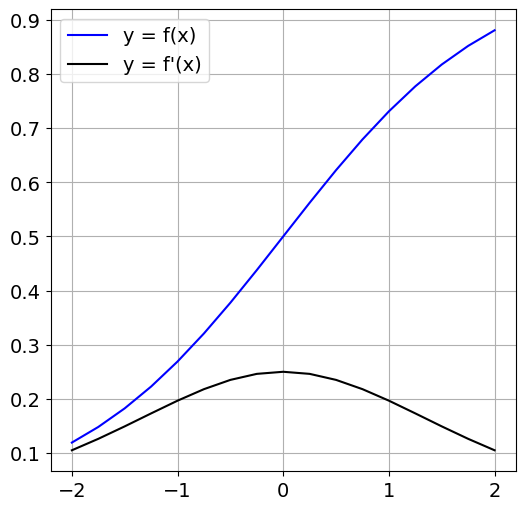

In [23]:
# 結果のグラフ表示
# Show the graph of results

plt.plot(x, y, label=r'y = f(x)', c = 'b')
plt.plot(x, y_dash, label=r"y = f'(x)", c = 'k')
plt.legend()
plt.show()

シグモイド関数の微分結果は$y(1-y)$となることがわかっている。  

Is is known that the differential result of the sigmoid function is $y(1-y)$. 

これはyの二次関数で、$y=\dfrac{1}{2}$の時に最大値$\dfrac{1}{4}$を取る。  

This is the quadratic function of y, and takes maximum value $\dfrac{1}{4}$ when $y=\dfrac{1}{2}$.

上のグラフはその結果と一致していて、数値微分が正しくできていることがわかる。

The upper graph agree with the result and you can see that the numerical differentiation is done correctly.

## 1.5 オブジェクト指向プログラミング入門

## 1.5 The introduction of object oriented programming and the definition of custom class

### クラスの最初の定義
### First definition of class

In [24]:
# グラフ描画用ライブラリ
# Libraly for drawing graphs
import matplotlib.pyplot as plt

# 円描画に必要なライブラリ
# Libraly for drawing circle
import matplotlib.patches as patches

In [25]:
# クラス Pointの定義
# The definition of the class "Point"
class Point:
    # インスタンス生成時にxとyの2つの引数を持つ
    # it has two arguments x and y when instantiated.
    def __init__(self, x, y):
        # インスタンスの属性xに第一引数をセットする
        # Set the first argument to the instance attribute x
        self.x = x
        # インスタンスの属性yに第二引数をセットする
        # Set the Second argument to the instance attribute y
        self.y = y
    # 描画関数 Drawの定義（引数はなし）
    # Definition of drawing function (No augument)
    def draw(self):
        # (x, y)に点を描画する
        # Draw points to (x, y)
        plt.plot(self.x, self.y, marker='o', markersize=10, c='k')

### 最初のインスタンス化
### First instantiation

In [26]:
# クラスPointからインスタンス変数p1とp2を生成する
# Generate instance variables p1 and p2 from class Point
p1 = Point(2, 3) 
p2 = Point(-1, -2)

### インスタンスの属性を参照
### Access to attribtion of instance

In [27]:
# p1とp2の属性x, yの参照
# Refferences to atrributes x, y of p1 and p1 
print(p1.x, p1.y)
print(p2.x, p2.y)

2 3
-1 -2


### 描画関数の呼び出し
### Call draw function

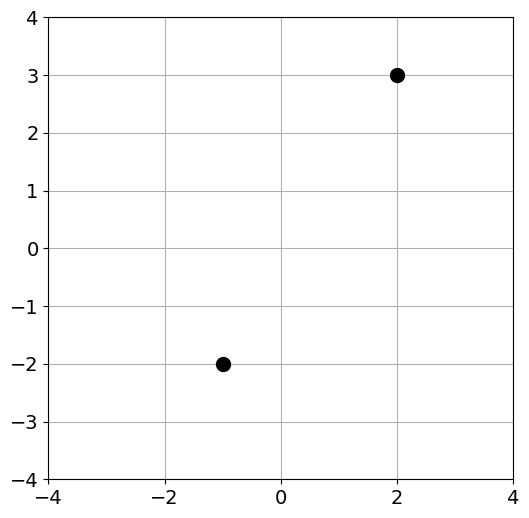

In [28]:
# p1とp2のdraw関数を呼び出し、2つの点を描画する
# Call p1 and p2 draw functions, and draw two circles
p1.draw()
p2.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

### Circle1 : クラスの定義
### Circle1 : The definition of class

In [29]:
# Pointの子クラスCircleの定義その1
# The Definition of Child class Circle of Point class : No1
class Circle(Point): 
    # Circleはインスタンス生成時に引数x, y, rを持つ
    # Circle has arguments x, y and r when instantiated
    def __init__(self, x, y, r):
        # xとyは、親クラスの属性として設定
        # Set x and y as the attribute of parent class
        super().__init__(x, y)
        # rは、Circleの属性として設定
        # Set r as the attribute of Circle
        self.r = r

    # この段階でdraw関数は定義しない
    # You don't need to define draw function here

### Circle1 : インスタンス生成と属性の確認
### Circle1 : Confirm generation of instance and atrribute

In [30]:
# クラスCircleからインスタンス変数c1_1を生成する
# Generate instance variable c1_1 from class Circle1
c1_1 = Circle(1, 0, 2)

# c1_1の属性の確認
# Confirm atrribute of c1_1
print(c1_1.x, c1_1.y, c1_1.r)

1 0 2


### 描画関数の呼び出し
### Call draw function

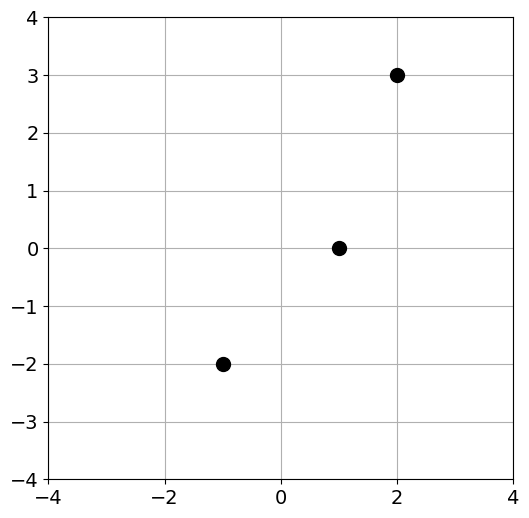

In [31]:
# p1, p2, c1_1のそれぞれのfraw関数を呼び出す
# Call draw functions of p1, p2 ans c1_1
ax = plt.subplot
p1.draw()
p2.draw()
c1_1.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

ここで、描画関数は親で定義された関数を呼び出す

Here we found the draw function called the function defined in the parent.

### Circle2 : クラスの定義
### Circle2 : The definition of class

In [32]:
# Pointの子クラスCircleの定義その2
# The definition of child class Circle of Point : No2
class Circle2(Point) :
    # Circleはインスタンス生成時に引数x, y, rを持つ
    # Circle has arguments x, y and r when instantiated
    def __init__(self, x, y, r):
        # xとyは、親クラスの属性として設定
        # Set x and y as the atrribute of parent class
        super().__init__(x, y)
        # rは、Circleの属性として設定
        # Set r as the atrribute of Circle
        self.r = r
    
    # draw関数は、子クラス独自に円の描画を行う
    # Draw function draw original circle as child class (override)
    def draw(self):
        # 円の描画
        # Draw circle
        c = patches.Circle(xy=(self.x, self.y), radius=self.r, fc='b', ec='k')
        ax.add_patch(c)

### Circle2 : インスタンス生成と描画関数の呼び出し
### Circle2 : Generate instance and call draw function

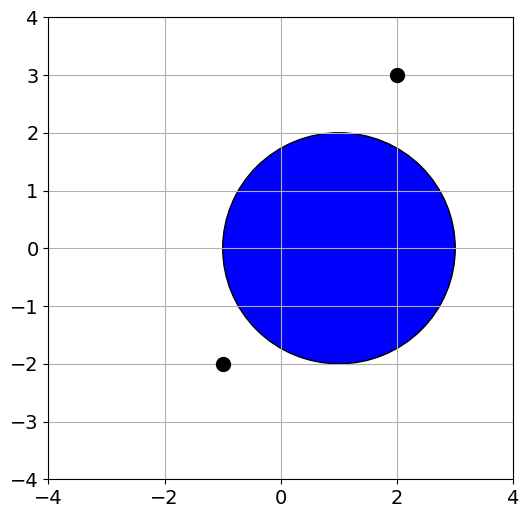

In [33]:
# クラスCircle2からインスタンス変数c2_1を生成する
# Generate instance variable c2_1 from class Circle2
c2_1 = Circle2(1, 0, 2)

# p1, p2, c2_1のそれぞれのfraw関数を呼び出す
# Call draw functions of p1, p2 and c2_1
ax = plt.subplot()
p1.draw()
p2.draw()
c2_1.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

### Circle3 : The implementation of class

We can see that the child's draw function was called instead of the parent's draw function.

So, What if we want to call both this function and the parent function?

In [34]:
# The definition of child class Circle of Point : No.3
class Circle3(Point):
    # Circle has arguments x, y and r when instantiated
    def __init__(self, x, y, r):
        # Set x and y as atrribute of parent class
        super().__init__(x, y)
        # Set r as atrribute of Circle
        self.r = r
    
    # The draw function of Circle draw original circle after calling parent function
    def draw(self):
        # Call draw function of parent class
        super().draw()

        # draw circle
        c = patches.Circle(xy=(self.x, self.y), radius=self.r, fc='b', ec='k')
        ax.add_patch(c)

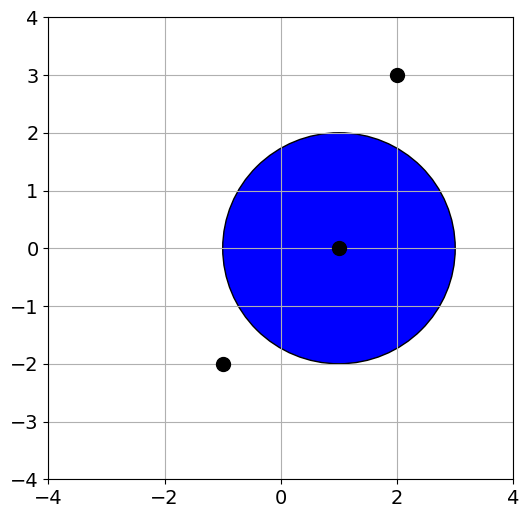

In [35]:
# Generate instance variable c3_1 from class Circle3
c3_1 = Circle3(1, 0, 2)

# Call draw fonctions of p1, p2, c3_1
ax = plt.subplot()
p1.draw()
p2.draw()
c3_1.draw()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

We were able to call both of functions。

## 1.6 Make an instance callable as a function

In [36]:
# The definition of function class
class H:
    def __call__(self, x):
        return 2*x**2 + 2

In [37]:
# Check H behaves as a function

# The definition of x as NumPy array 
x = np.arange(-2, 2.1, 0.25)
print(x)

# Generate h as the instance of H class
h = H()

# Call function h
y = h(x)
print(y)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]
[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


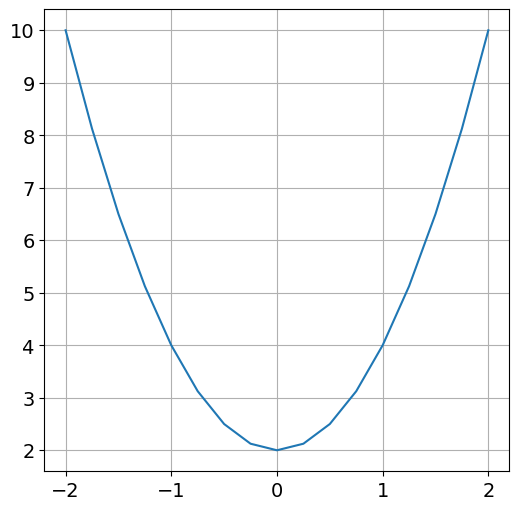

In [38]:
# Show graph
plt.plot(x, y)
plt.show()